# Exercise Sheet 10

Willy Oesterheld (508791)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd


## A

Lambda	| Upper Limit	| Lower Limit	| Range
0	| 0.0		| 0.0		| [0.0, 0.0]
1	| 2.0		| 0.0		| [0.0, 3.0]
2	| 4.0		| 0.0		| [0.0, 5.0]
3	| 5.0		| 1.0		| [1.0, 6.0]
4	| 7.0		| 2.0		| [1.0, 8.0]
5	| 8.0		| 2.0		| [2.0, 9.0]
6	| 9.0		| 3.0		| [2.0, 10.0]
7	| 10.0		| 4.0		| [3.0, 12.0]
8	| 12.0		| 5.0		| [4.0, 13.0]
9	| 13.0		| 5.0		| [4.0, 14.0]
10	| 14.0		| 6.0		| [5.0, 15.0]
11	| 15.0		| 7.0		| [6.0, 17.0]
12	| 17.0		| 8.0		| [7.0, 18.0]


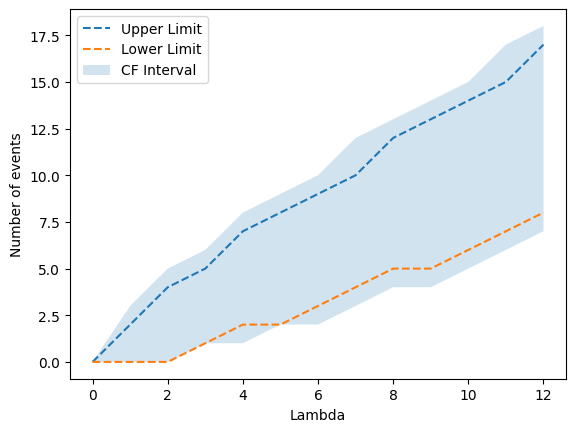

In [5]:
n_test = np.arange(0,100)
lmbda = np.arange(0,13)
n_upper = np.zeros(13) - 1
n_lower = n_upper.copy()
n_range_upper = n_upper.copy()
n_range_lower = n_upper.copy()

print("Lambda\t| Upper Limit\t| Lower Limit\t| Range")
for i, l in enumerate(lmbda):
    c = sp.stats.poisson.cdf(n_test, l)
    n_upper[i] = np.argmin(c < 0.9)
    n_lower[i] = np.argmax(c > 0.1)
    n_range_upper[i] = np.argmin(c < 0.95)
    n_range_lower[i] = np.argmax(c > 0.05)
    print(f"{l}\t| {n_upper[i]}\t\t| {n_lower[i]}\t\t| [{n_range_lower[i]}, {n_range_upper[i]}]")

plt.plot(lmbda, n_upper, "--", label="Upper Limit")
plt.plot(lmbda, n_lower, "--", label="Lower Limit")
plt.fill_between(lmbda, n_range_upper, n_range_lower, alpha=0.2, label="CF Interval")
plt.xlabel("Lambda")
plt.ylabel("Number of events")
plt.legend()
plt.show()

Events	| Upper Limit	| Lower Limit	| Range
0	| 2.3		| 0.105		| [0.0513, 4.61]
1	| 3.89		| 0.532		| [0.355, 6.64]
2	| 5.32		| 1.1		| [0.818, 8.41]
3	| 6.68		| 1.74		| [1.37, 10.0]
4	| 7.99		| 2.43		| [1.97, 11.6]
5	| 9.27		| 3.15		| [2.61, 13.1]
6	| 10.5		| 3.89		| [3.29, 14.6]
7	| 11.8		| 4.66		| [3.98, 16.0]
8	| 13.0		| 5.43		| [4.7, 17.4]
9	| 14.2		| 6.22		| [5.43, 18.8]
10	| 15.4		| 7.02		| [6.17, 20.1]
11	| 16.6		| 7.83		| [6.92, 21.5]
12	| 17.8		| 8.65		| [7.69, 22.8]


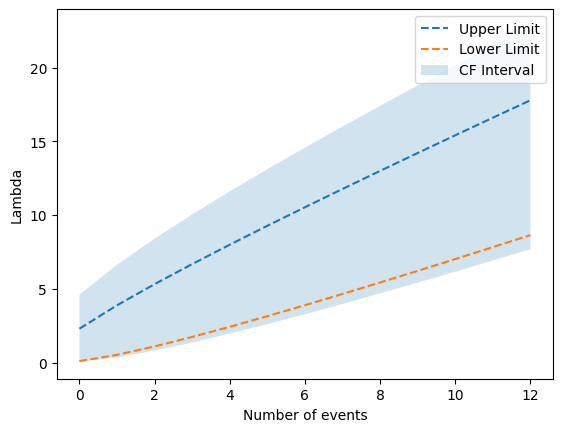

In [6]:
n = np.arange(0,13)
l_upper = np.zeros(13) - 1
l_lower = l_upper.copy()
l_range_upper = l_upper.copy()
l_range_lower = l_upper.copy()

def find_lambda(event_count, offset):
    return sp.optimize.bisect(lambda x : sp.stats.poisson.cdf(event_count, x)-offset, 0, 100)

print("Events\t| Upper Limit\t| Lower Limit\t| Range")
for i in n:
    l_upper[i] = find_lambda(i, 0.1)
    l_lower[i] = find_lambda(i, 0.9)
    l_range_upper[i] = find_lambda(i, 0.01)
    l_range_lower[i] = find_lambda(i, 0.95)
    print(f"{i}\t| {l_upper[i]:.3}\t\t| {l_lower[i]:.3}\t\t| [{l_range_lower[i]:.3}, {l_range_upper[i]:.3}]")

plt.plot(n, l_upper, "--", label="Upper Limit")
plt.plot(n, l_lower, "--", label="Lower Limit")
plt.fill_between(n, l_range_upper, l_range_lower, alpha=0.2, label="CF Interval")
plt.xlabel("Number of events")
plt.ylabel("Lambda")
plt.legend()
plt.show()

## B

In [19]:
n = 5
l_b = 1.8
cl = 0.95

p = 1 - sp.stats.poisson.cdf(n-1, l_b)
print(f"The probability to observe {n} or more background events is {p:.4}")

l = find_lambda(n, 1-cl)
print(f"The upper limit for the expected signal events is {l-l_b:.4} at a confidence level of {cl*100}%")

The probability to observe 5 or more background events is 0.03641
The upper limit for the expected signal events is 8.713 at a confidence level of 95.0%
